In [37]:
#Importing Python libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.features import RadViz

In [38]:
#Load local file
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving New_cars_cleaned.csv to New_cars_cleaned (2).csv
User uploaded file "New_cars_cleaned.csv" with length 7236793 bytes


In [39]:
#Transforming the file to dataframe df
df = pd.read_csv('New_cars_cleaned.csv')
df.head()

,MSRP,EPA Fuel Economy Est - City (MPG),Engine,Drivetrain,Passenger Capacity,Passenger Doors,Base Curb Weight (lbs),Passenger Volume (ft³),Wheelbase (in),"Track Width, Front (in)","Height, Overall (in)","Fuel Tank Capacity, Approx (gal)",SAE Net Torque @ RPM,Fuel System,SAE Net Horsepower @ RPM,Displacement,Trans Description Cont.,Trans Type,Suspension Type - Front,Suspension Type - Rear,Air Bag-Frontal-Driver,Air Bag-Frontal-Passenger,Air Bag-Passenger Switch (On/Off),Air Bag-Side Body-Front,Air Bag-Side Body-Rear,Air Bag-Side Head-Front,Air Bag-Side Head-Rear,Brakes-ABS,Child Safety Rear Door Locks,Daytime Running Lights,Traction Control,Night Vision,Rollover Protection Bars,Fog Lamps,Parking Aid,Tire Pressure Monitor,Back-Up Camera,Stability Control,Basic Miles/km,Basic Years,Corrosion Miles/km,Corrosion Years,Drivetrain Miles/km,Drivetrain Years,Turning Diameter - Curb to Curb (ft),Front Wheel Material,Stabilizer Bar Diameter - Front (in),Roadside Assistance Years,Roadside Assistance Miles/km,Manufacturer,Model year,Category,Front tire width,Front tire aspect ratio,Front tire speed ratings/cons.type,Front tire rim size
0,40600.0,22.0,l4,FWD,5,4,3790.0,104.0,108.3,64.2,65.7,17.1,280.0,DI,272.0,2.0,Automatic,10,MacPherson Strut,Link type,1,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,50000.0,4.0,150000.0,5.0,70000.0,6.0,39.0,Aluminum,NaN,NaN,50000.0,Acura,2019,SUV,235,55.0,H,19.0
1,45500.0,22.0,l4,FWD,5,4,3829.0,104.0,108.3,64.2,65.7,17.1,280.0,DI,272.0,2.0,Automatic,10,MacPherson Strut,Link type,1,1,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,50000.0,4.0,150000.0,5.0,70000.0,6.0,39.0,Aluminum,NaN,NaN,50000.0,Acura,2019,SUV,235,55.0,H,19.0
2,43600.0,22.0,l4,FWD,5,4,3821.0,104.0,108.3,64.2,65.7,17.1,280.0,DI,272.0,2.0,Automatic,10,MacPherson Strut,Link type,1,1,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,50000.0,4.0,150000.0,5.0,70000.0,6.0,39.0,Aluminum,NaN,NaN,50000.0,Acura,2019,SUV,255,45.0,V,20.0
3,37400.0,22.0,l4,FWD,5,4,3783.0,104.0,108.3,64.2,65.7,17.1,280.0,DI,272.0,2.0,Automatic,10,MacPherson Strut,Link type,1,1,0,1,0,1,1,1,1,1,1,0,0,0,0,1,1,1,50000.0,4.0,150000.0,5.0,70000.0,6.0,39.0,Aluminum,NaN,NaN,50000.0,Acura,2019,SUV,235,55.0,H,19.0
4,42600.0,21.0,l4,AWD,5,4,4026.0,104.0,108.3,64.2,65.7,17.1,280.0,DI,272.0,2.0,Automatic,10,MacPherson Strut,Link type,1,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,50000.0,4.0,150000.0,5.0,70000.0,6.0,39.0,Aluminum,NaN,NaN,50000.0,Acura,2019,SUV,235,55.0,H,19.0


In [40]:
#Checking for empty values
df.isna().sum()

MSRP                                       54
EPA Fuel Economy Est - City (MPG)        5289
Engine                                   1975
Drivetrain                               1716
Passenger Capacity                          0
Passenger Doors                             0
Base Curb Weight (lbs)                  12860
Passenger Volume (ft³)                  15560
Wheelbase (in)                           2015
Track Width, Front (in)                 12186
Height, Overall (in)                    16688
Fuel Tank Capacity, Approx (gal)        16701
SAE Net Torque @ RPM                     2067
Fuel System                              2830
SAE Net Horsepower @ RPM                 2014
Displacement                             2147
Trans Description Cont.                  2037
Trans Type                               1981
Suspension Type - Front                     0
Suspension Type - Rear                      0
Air Bag-Frontal-Driver                      0
Air Bag-Frontal-Passenger         

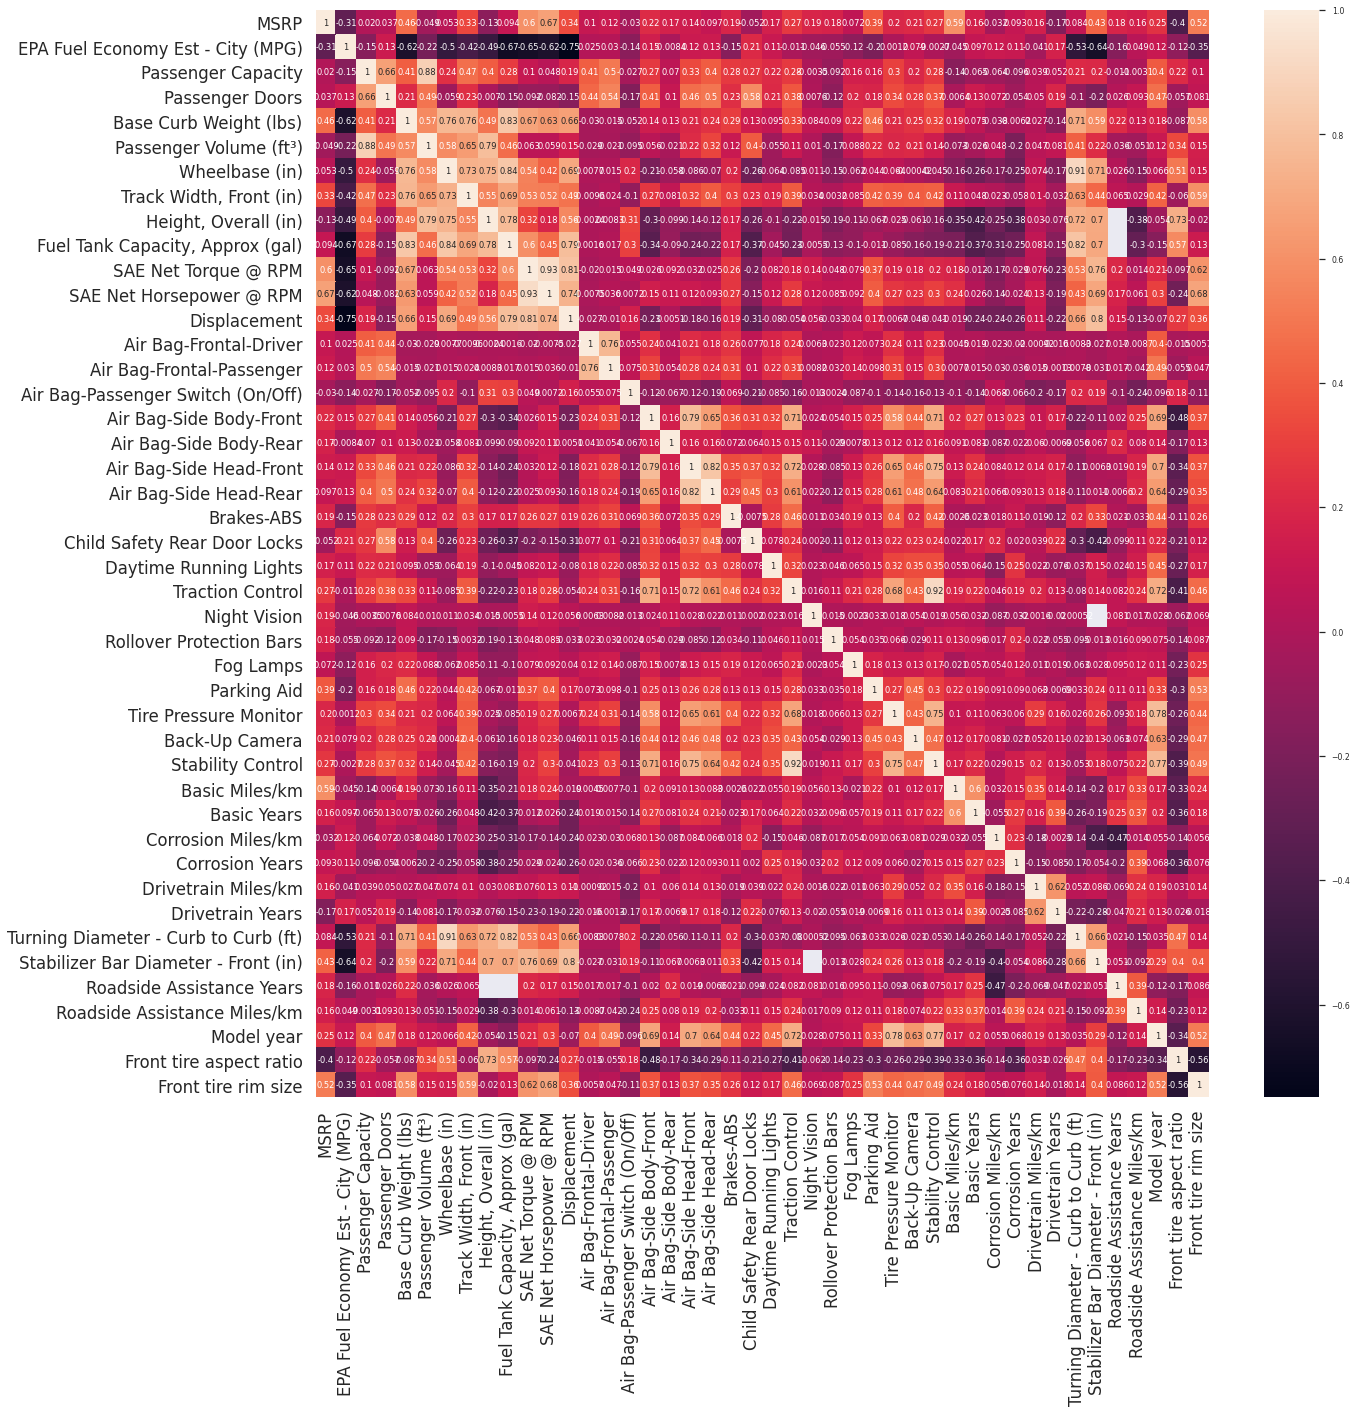

In [41]:
#Showing the correlation matrix
corr = df.corr()
plt.subplots(figsize=(20,20))
sns.set(font_scale=0.7)
sns.heatmap(corr, annot=True, fmt='.2g')
plt.show()

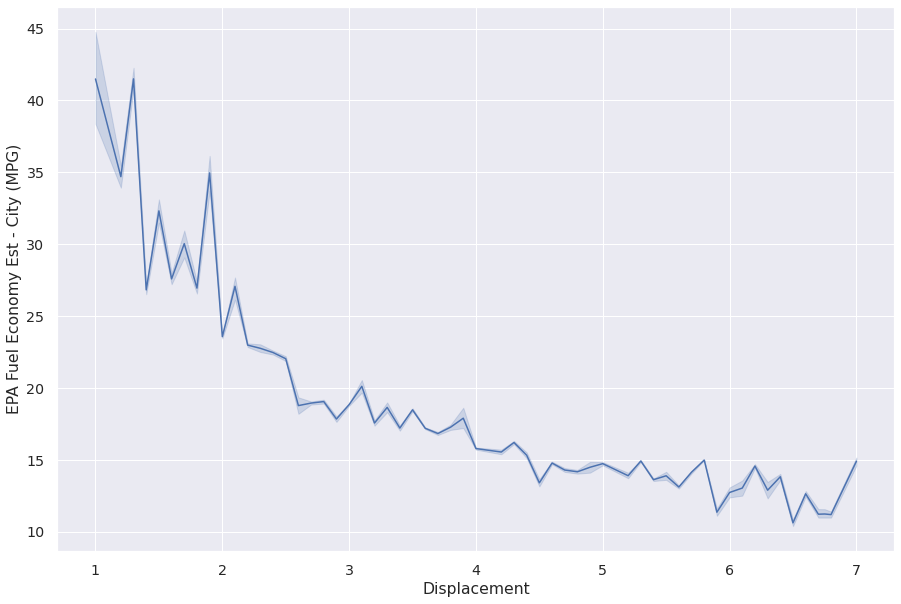

In [42]:
#Ploting graph Displacement x MPG
plt.figure(figsize=(15,10))
sns.set(font_scale=1.3)
sns.lineplot(x=df['Displacement'], y=df['EPA Fuel Economy Est - City (MPG)'])
plt.xlabel('Displacement')
plt.ylabel('EPA Fuel Economy Est - City (MPG)')
plt.show()

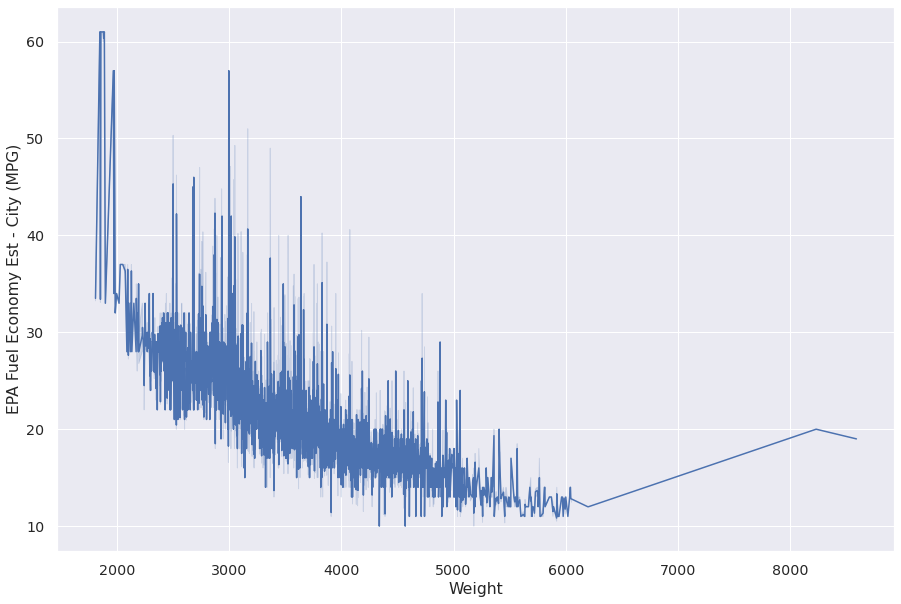

In [43]:
#Ploting graph Weight x MPG
plt.figure(figsize=(15,10))
sns.lineplot(x=df['Base Curb Weight (lbs)'], y=df['EPA Fuel Economy Est - City (MPG)'])
plt.xlabel('Weight')
plt.ylabel('EPA Fuel Economy Est - City (MPG)')
plt.show()

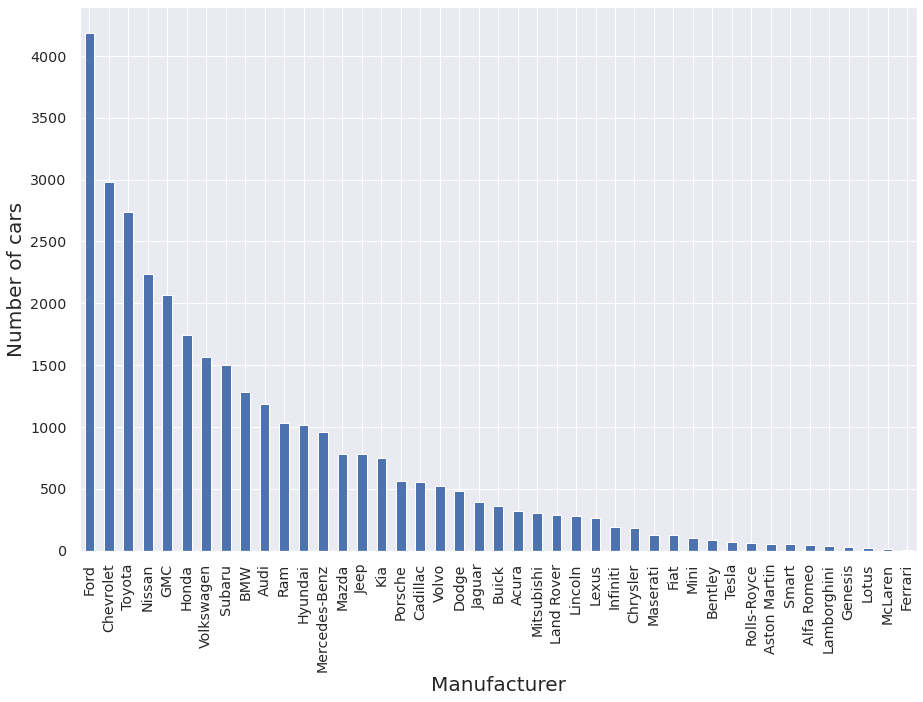

In [44]:
#Shows the ammount of each type of manufacturer
da=df['Manufacturer'].value_counts()
plt.figure(figsize=(15,10))
plt.xlabel('Manufacturer', size=20)
plt.ylabel('Number of cars', size=20) 
da.plot(kind="bar")

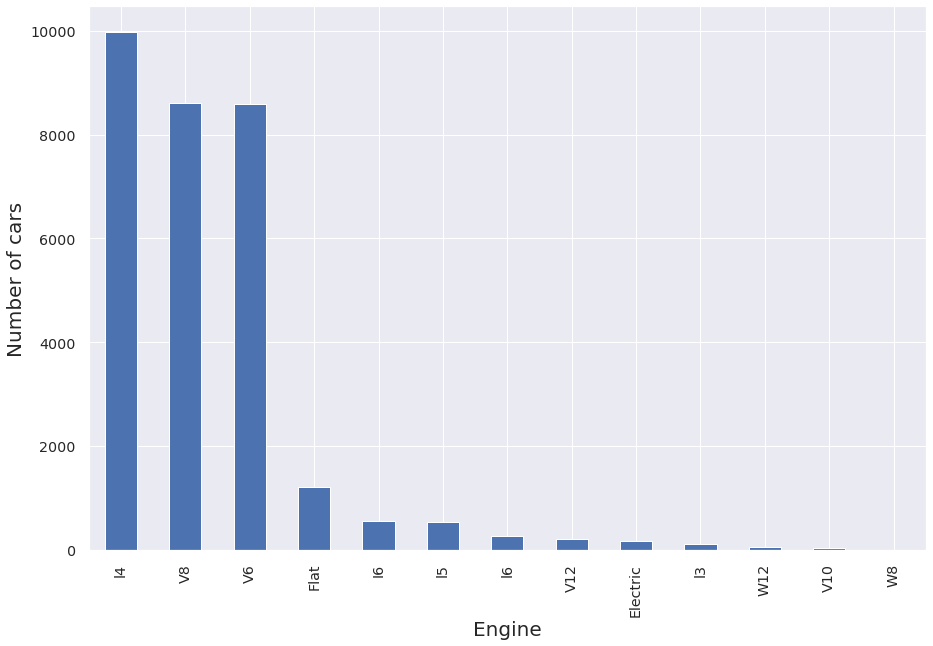

In [45]:
#Shows the ammount of each type of engine
da=df['Engine'].value_counts()
plt.figure(figsize=(15,10))
plt.xlabel('Engine', size=20)
plt.ylabel('Number of cars', size=20) 
da.plot(kind="bar")

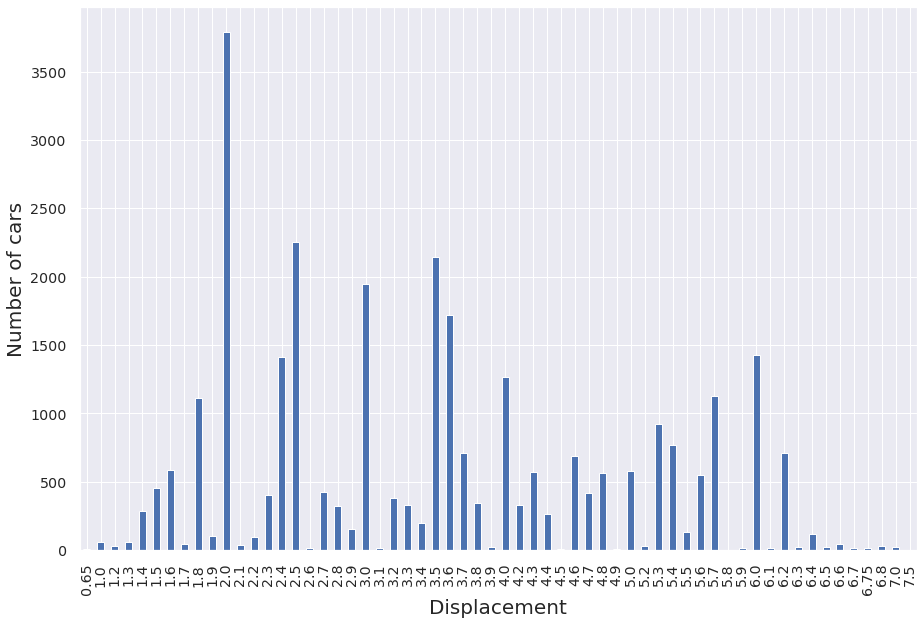

In [46]:
#Shows the ammount of each type of displacement
da=df['Displacement'].value_counts().sort_index()
plt.figure(figsize=(15,10))
plt.xlabel('Displacement', size=20)
plt.ylabel('Number of cars', size=20) 
da.plot(kind="bar")

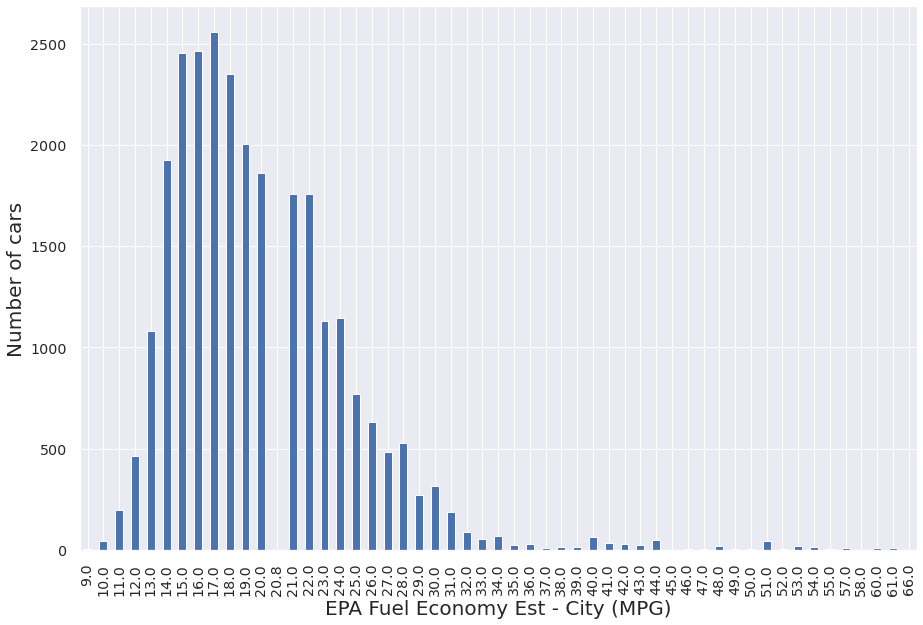

In [47]:
#Shows the ammount of each type of 'EPA'
da=df['EPA Fuel Economy Est - City (MPG)'].value_counts().sort_index()
plt.figure(figsize=(15,10))
plt.xlabel('EPA Fuel Economy Est - City (MPG)', size=20)
plt.ylabel('Number of cars', size=20) 
da.plot(kind="bar")

In [48]:
#Drop all lines that contains these empty values. LabelEnconder (numeric conversion of string values) does not work with empty values
df['EPA Fuel Economy Est - City (MPG)'].replace('', np.nan, inplace=True)
df.dropna(subset=['EPA Fuel Economy Est - City (MPG)'], inplace=True)

df['Base Curb Weight (lbs)'].replace('', np.nan, inplace=True)
df.dropna(subset=['Base Curb Weight (lbs)'], inplace=True)

df['Fuel Tank Capacity, Approx (gal)'].replace('', np.nan, inplace=True)
df.dropna(subset=['Fuel Tank Capacity, Approx (gal)'], inplace=True)

df['SAE Net Torque @ RPM'].replace('', np.nan, inplace=True)
df.dropna(subset=['SAE Net Torque @ RPM'], inplace=True)

df['SAE Net Horsepower @ RPM'].replace('', np.nan, inplace=True)
df.dropna(subset=['SAE Net Horsepower @ RPM'], inplace=True)

df['Displacement'].replace('', np.nan, inplace=True)
df.dropna(subset=['Displacement'], inplace=True)

df['Turning Diameter - Curb to Curb (ft)'].replace('', np.nan, inplace=True)
df.dropna(subset=['Turning Diameter - Curb to Curb (ft)'], inplace=True)

df['Stabilizer Bar Diameter - Front (in)'].replace('', np.nan, inplace=True)
df.dropna(subset=['Stabilizer Bar Diameter - Front (in)'], inplace=True)

df['Fuel System'].replace('', np.nan, inplace=True)
df.dropna(subset=['Fuel System'], inplace=True)

In [49]:
#Replacing NaN values with '0'
df = df.replace(r'^\s*$', np.NaN, regex=True)
df.fillna(0, inplace = True)
df['EPA Fuel Economy Est - City (MPG)']=df['EPA Fuel Economy Est - City (MPG)'].astype(int)
df['Displacement']=df['Displacement'].astype(float)

In [50]:
#LabelEnconder (numeric conversion of string values)
x = df.iloc[:,2:52].values
y = df.iloc[:, 1].values
y=y.astype(int)
labelencoder = LabelEncoder()
x[:,0] = labelencoder.fit_transform(x[:,0])
x[:,1] = labelencoder.fit_transform(x[:,1])
x[:,11] = labelencoder.fit_transform(x[:,11])
x[:,14] = labelencoder.fit_transform(x[:,14])
x[:,15] = labelencoder.fit_transform(x[:,15])
x[:,16] = labelencoder.fit_transform(x[:,16])
x[:,17] = labelencoder.fit_transform(x[:,17])
x[:,43] = labelencoder.fit_transform(x[:,43])
x[:,47] = labelencoder.fit_transform(x[:,47])
x[:,49] = labelencoder.fit_transform(x[:,49])

In [51]:
#Splitting the dataframe into train and test. 30% is test
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

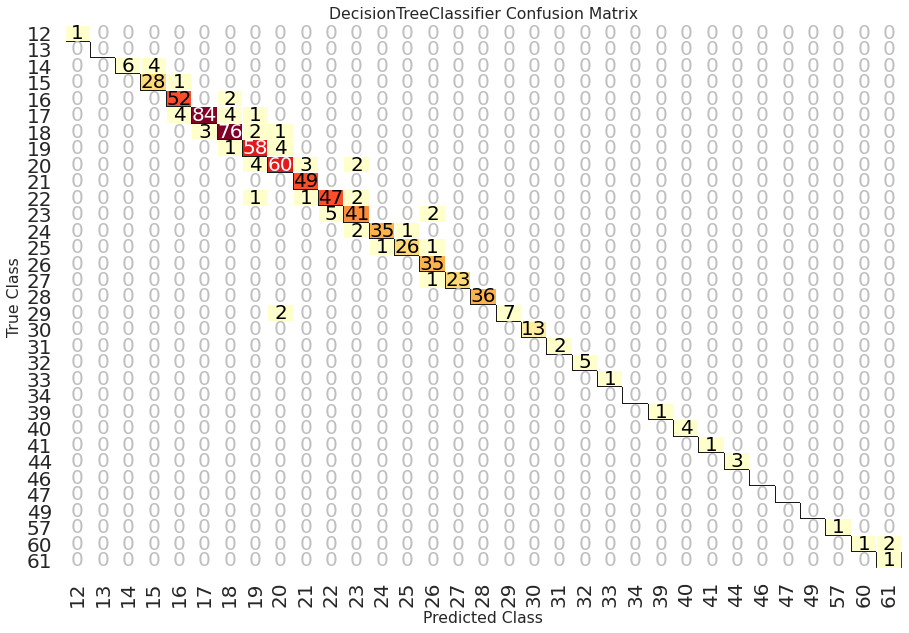

In [52]:
#Decision Tree model
modelo1 = DecisionTreeClassifier(criterion = 'entropy')
modelo1.fit(x_treinamento, y_treinamento)
export_graphviz(modelo1, out_file = 'modelo1.dot')
previsoes1 = modelo1.predict(x_teste)
confusao1 = ConfusionMatrix(modelo1, fontsize=20)
visualizer = RadViz(classes=modelo1, size=(1080, 720))
confusao1.fit(x_treinamento, y_treinamento)
confusao1.score(x_teste, y_teste)
confusao1.poof()

In [53]:
#Accuracy score
accuracy_score(y_teste, previsoes1)

0.9232804232804233

In [54]:
#Predicting a car that is not on the database. 2012 Suzuki Kizashi
x_suzuki=[[3,2,5,4,3241,105.4,106.3,71.7,58.3,16.6,170,2,180,2.4,1,3,1,2,1,1,0,1,0,1,0,1,1,1,1,0,0,1,0,1,0,1,36000,3,150000,5,100000,7,36,0,0.94,3,36000,99,2012,0]]
previsoes1 = modelo1.predict(x_suzuki)
previsoes1

array([23])

In [ ]:
#Webpage to visualize the decision tree
https://dreampuf.github.io/GraphvizOnline/